In [1]:
import pandas as pd

""" Sandobx for all things realted to Snippets extraction and generic stuff.
Not downstream things (elsewhere).
"""

' Sandobx for all things realted to Snippets extraction and generic stuff.\nNot downstream things (elsewhere).\n'

In [2]:
%load_ext autoreload
%autoreload 2

from neuralmonkey.classes.session import load_mult_session_helper
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

#%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Searching using this string:
/mnt/Freiwald/ltian/recordings/*Diego*/*230817*/**
Found this many paths:
1
---
/mnt/Freiwald/ltian/recordings/Diego/230817/Diego-230817-150802
session:  0
Beh Sessions that exist on this date:  {230817: [(1, 'dirgrammardiego5c')]}
------------------------------
Loading this neural session: 0
Loading these beh expts: ['dirgrammardiego5c']
Loading these beh sessions: [1]
Using this beh_trial_map_list: [(1, 0)]
Searching using this string:
/mnt/Freiwald/ltian/recordings/*Diego*/*230817*/**
Found this many paths:
1
---
/mnt/Freiwald/ltian/recordings/Diego/230817/Diego-230817-150802
{'filename_components_hyphened': ['Diego', '230817', '150802'], 'basedirs': ['/mnt/Freiwald/ltian/recordings/Diego', '/mnt/Freiwald/ltian/recordings/Diego/230817'], 'basedirs_filenames': ['230817', 'Diego-230817-150802'], 'filename_final_ext': 'Diego-230817-150802', 'filename_final_noext': 'Diego-230817-150802'}
FOund this path for spikes:  /mnt/Freiwald/ltian/recordings/Diego/23081

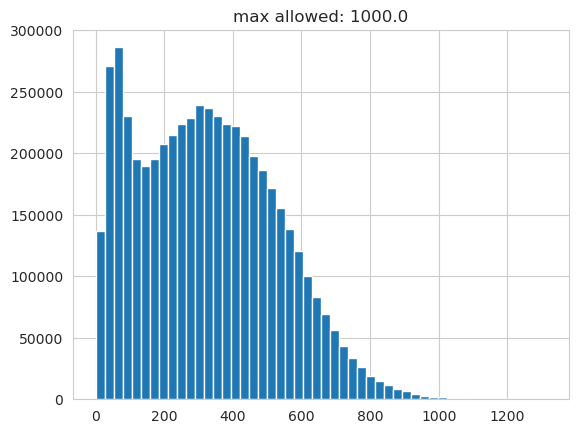

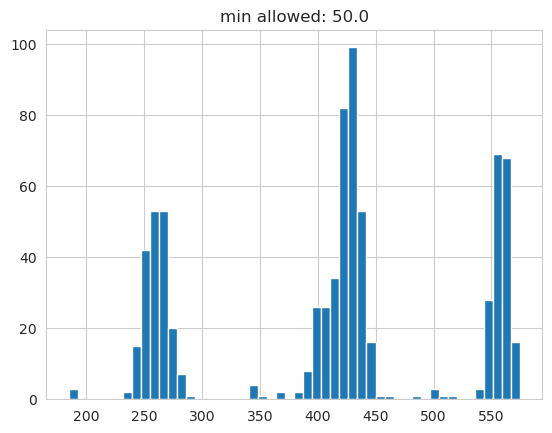

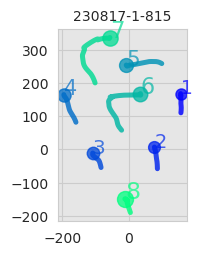

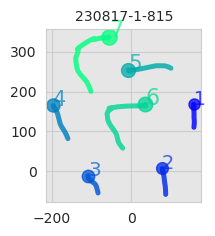

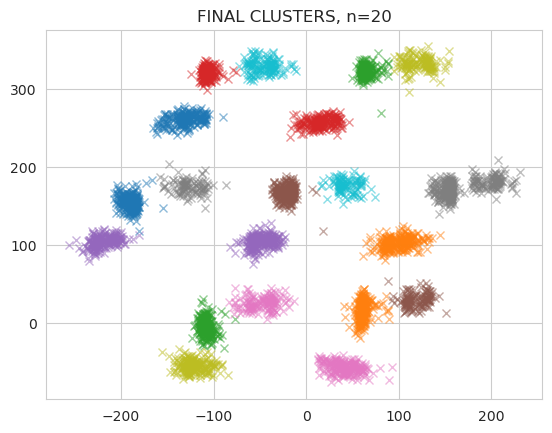

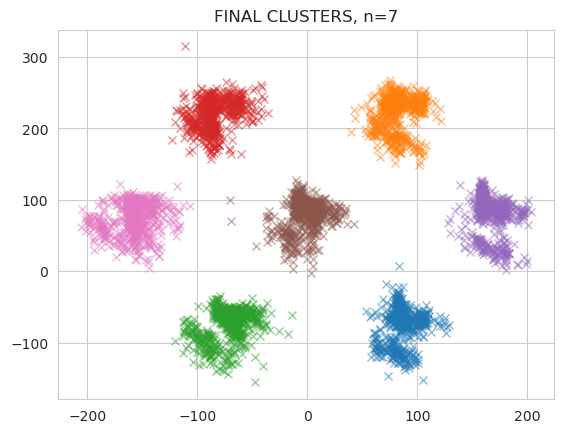

In [3]:
# DATE = 230622
# animal = "Pancho"
DATE = 230817
animal = "Diego"
spikes_version = "tdt"
# spikes_version = "kilosort_if_exists"
MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version=spikes_version) 
# MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version="tdt") 

In [ ]:

### Snippets, split by stroke index and location
MS.print_summary_sessions()
from neuralmonkey.classes.snippets import Snippets, extraction_helper

# Pick out a single session
sn = MS.SessionsList[0]


In [4]:
# Turn on debug mode, this prunes sites and trials, so below runs faster
# sn.debug_mode_switch_to(sites=True, trials=False)
for sn in MS.SessionsList:
    sn.debug_mode_switch_to(sites=True, trials=True)

In [ ]:
sn.sitegetter_print_summarytext_each_unit

In [ ]:
#### TODO:

In [ ]:
# problem 1. Stroke onset time -- why don't they match between SN and Datasetbeh.
# problem 2. concatting DS across sessions for Pancho --> failing.

##### Loading beh dataset from raw

In [ ]:
sn.datasetbeh_load_helper(sn.DatasetbehExptname)

# [GOOD] Extract Snippets across all SN in MS, and clean as you would if you loaded from pre-saved

### Wrapper to regenerate Snippets

In [ ]:
from neuralmonkey.classes.snippets import load_and_concat_mult_snippets
which_level = "stroke"
EVENTS_KEEP = None
SP, SAVEDIR_ALL = load_and_concat_mult_snippets(MS, which_level, EVENTS_KEEP)

In [ ]:
# Load a question
from neuralmonkey.analyses.rsa import rsagood_questions_dict
date = DATE
# question = "CHAR_BASE_trial"
# question = "CHAR_BASE_stroke"
question = "PIG_BASE_stroke"
substrokes_plot_preprocess = False
HACK_RENAME_SHAPES = False

q_params = rsagood_questions_dict(animal, date, question=question)[question]
print("Question:", question)
print("These questions params:")
for k, v in q_params.items():
    print(k, " -- ", v)
assert which_level in q_params["list_which_level"], "or else might run into error later."

# Clean up SP and extract features
D, list_features_extraction = SP.datasetbeh_preprocess_clean_by_expt(
    ANALY_VER=q_params["ANALY_VER"], vars_extract_append=q_params["effect_vars"],
    substrokes_plot_preprocess=substrokes_plot_preprocess,
    HACK_RENAME_SHAPES=HACK_RENAME_SHAPES)


##### Debugging

In [ ]:
from neuralmonkey.classes.snippets import datasetstrokes_extract
sn = MS.SessionsList[1]
D = sn.Datasetbeh
DS = datasetstrokes_extract(D, "all_no_clean")

### Below -- breaking out the above function

In [5]:
from neuralmonkey.scripts.analy_snippets_extract import extract_snippets_all_sessions

which_level = "stroke"
EVENTS_KEEP = None

# which_level = "trial"
# EVENTS_KEEP = ["03_samp", "go_cue"]

# version 2
LIST_SP = extract_snippets_all_sessions(MS, which_level, EVENTS_KEEP, 1, False)

** NOT SKIPPING EXTRACTION, since was not able to load snippets, for: 
(animal, DATE, which_level, session)
Diego 230817 stroke 0
Starting length of D.Dat: 741
--BEFORE REMOVE; existing supervision_stage_concise:
off|1|solid|1101|0     664
off|0||1111|0           59
mask|1|solid|1101|0     18
Name: supervision_stage_concise, dtype: int64
############ NOT PRUNING SUPERVISION TRIALS
Dataset final len: 741
*** RUNNING D.preprocessGood using these params:
['sanity_gridloc_identical']
-- Len of D, before applying this param: sanity_gridloc_identical, ... 741
Success! all gridloc identical!
These are the x and y mappings, gridloc:loc
x... {-1: -1.0, 1: 0.75, 0: -0.125, -2: -1.875, 2: 1.625}
y... {-1: -1.525, 1: 1.625, 0: 0.05}
after: 741
Kept these events:  []

 == extarcating these sites:  [1, 33, 65, 97, 129, 161, 225, 257, 289, 321, 353, 385, 417, 449, 481]
0
100
200
300
400
500
600
700
This many strokes extracted:  4439
DONE!
Appended epoch to self.Dat
Appended character to self.Dat

 ==

In [6]:
# # Reproduce this.
# SP, SAVEDIR_ALL = load_and_concat_mult_snippets(MS, which_level = which_level,
#     DEBUG=DEBUG)

from neuralmonkey.classes.snippets import concat_mult_snippets
SP = concat_mult_snippets(LIST_SP, MS)

This many vals across loaded session
0 : 1875
Assigning to SP.Params this item:
{'which_level': 'stroke', '_list_events': ['00_stroke'], 'list_events_uniqnames': ['00_stroke'], 'list_features_extraction': [], 'list_features_get_conjunction': [], 'list_pre_dur': [-0.8], 'list_post_dur': [0.8], 'map_var_to_othervars': None, 'strokes_only_keep_single': None, 'tasks_only_keep_these': None, 'prune_feature_levels_min_n_trials': 1, 'fr_which_version': 'sqrt', 'SPIKES_VERSION': 'tdt', 'map_var_to_levels': None}
Assigning to SP.ParamsGlobals this item:
{'n_min_trials_per_level': 5, 'lenient_allow_data_if_has_n_levels': 2, 'PRE_DUR_CALC': -0.8, 'POST_DUR_CALC': 0.8, 'list_events': ['00_stroke'], 'list_pre_dur': [-0.8], 'list_post_dur': [0.8]}
Keeping this many sites that pass fr thresh:
15 / 15
Using threshold:  1.5
Updated self.Sites


In [27]:
SP.datasetbeh_extract_dataset().Dat["trialcode"]

0         230817-1-1
1        230817-1-10
2       230817-1-100
3      230817-1-1000
4      230817-1-1001
           ...      
736     230817-1-994
737     230817-1-996
738     230817-1-997
739     230817-1-998
740     230817-1-999
Name: trialcode, Length: 741, dtype: object

In [31]:
SP.DS = None

In [32]:
SP.datasetbeh_extract_dataset("datstrokes").Dat["trialcode"]

GENERATING DS FOR THE FIRST TIME...
0
100
200
300
400
500
600
700
This many strokes extracted:  4439
DONE!
Appended epoch to self.Dat
Appended character to self.Dat


0         230817-1-1
1      230817-1-1025
2      230817-1-1025
3      230817-1-1025
4      230817-1-1025
           ...      
120     230817-1-978
121     230817-1-978
122     230817-1-978
123     230817-1-978
124     230817-1-978
Name: trialcode, Length: 125, dtype: object

In [33]:
[tc for tc in SP.DS.Dat["trialcode"] if tc in SP.datasetbeh_extract_dataset().Dat["trialcode"].tolist()]

['230817-1-1',
 '230817-1-1025',
 '230817-1-1025',
 '230817-1-1025',
 '230817-1-1025',
 '230817-1-1025',
 '230817-1-1025',
 '230817-1-1025',
 '230817-1-1069',
 '230817-1-1069',
 '230817-1-1069',
 '230817-1-1069',
 '230817-1-1069',
 '230817-1-1069',
 '230817-1-1069',
 '230817-1-1113',
 '230817-1-121',
 '230817-1-121',
 '230817-1-121',
 '230817-1-121',
 '230817-1-121',
 '230817-1-121',
 '230817-1-121',
 '230817-1-167',
 '230817-1-167',
 '230817-1-167',
 '230817-1-167',
 '230817-1-167',
 '230817-1-167',
 '230817-1-167',
 '230817-1-208',
 '230817-1-208',
 '230817-1-208',
 '230817-1-208',
 '230817-1-208',
 '230817-1-208',
 '230817-1-208',
 '230817-1-251',
 '230817-1-251',
 '230817-1-251',
 '230817-1-251',
 '230817-1-251',
 '230817-1-251',
 '230817-1-251',
 '230817-1-329',
 '230817-1-329',
 '230817-1-329',
 '230817-1-329',
 '230817-1-329',
 '230817-1-329',
 '230817-1-329',
 '230817-1-40',
 '230817-1-40',
 '230817-1-40',
 '230817-1-40',
 '230817-1-40',
 '230817-1-40',
 '230817-1-40',
 '230817

In [42]:
# dataset preprocess
ANALYVER = "rulesingle"
D, list_features_extraction = SP.datasetbeh_preprocess_clean_by_expt(
    ANALY_VER=ANALYVER, vars_extract_append=[])



 ++++ USING THIS ANALY_VER: rulesingle
[] True False
Appending outliers...
Appending index datrapts...
Running dataset_apply_params...
Dataset preprocess, these params:
{'DO_CHARSEQ_VER': 'task_matlab', 'EXTRACT_EPOCHSETS': True, 'EXTRACT_EPOCHSETS_trial_label': 'char_seq', 'EXTRACT_EPOCHSETS_n_max_epochs': 3, 'EXTRACT_EPOCHSETS_merge_sets': True, 'taskgroup_reassign_simple_neural': False, 'preprocess_steps_append': ['correct_sequencing_binary_score', 'one_to_one_beh_task_strokes', 'beh_strokes_at_least_one'], 'remove_aborts': False, 'list_superv_keep': None, 'list_superv_keep_full': None, 'DO_SCORE_SEQUENCE_VER': 'parses', 'list_epoch_merge': [], 'epoch_merge_key': None, 'DO_EXTRACT_EPOCHKIND': True, 'datasetstrokes_extract_to_prune_trial': None, 'datasetstrokes_extract_to_prune_stroke_and_get_features': None, 'substrokes_features_do_extraction': False, 'charclust_dataset_extract_shapes': False, 'datasetstrokes_extract_chunks_variables': True}
Defined new column: epochset
.. Appended 

Traceback (most recent call last):
  File "/home/lucast4/miniconda3/envs/drag2_matlab/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_28932/2979081780.py", line 3, in <module>
    D, list_features_extraction = SP.datasetbeh_preprocess_clean_by_expt(
  File "/gorilla1/code/neuralmonkey/neuralmonkey/classes/snippets.py", line 7227, in datasetbeh_preprocess_clean_by_expt
    D, DS, params = dataset_apply_params(D, DS, ANALY_VER, animal, date, save_substroke_preprocess_figures=substrokes_plot_preprocess) # prune it
  File "/gorilla1/code/neuralmonkey/neuralmonkey/metadat/analy/anova_params.py", line 1139, in dataset_apply_params
    DS.context_chunks_assign_columns()
  File "/gorilla1/code/pythonlib/pythonlib/dataset/dataset_strokes.py", line 2397, in context_chunks_assign_columns
    chunk_diff, rank_within_diff = self.context_chunks_diff(ind, first_stroke_diff_to_zero=True)


In [43]:
D = SP.datasetbeh_extract_dataset().copy()

In [44]:
DS = SP.datasetbeh_extract_dataset("datstrokes")

In [25]:
DS.Dat["trialcode"]

Series([], Name: trialcode, dtype: object)

In [23]:
DS.dataset_slice_by("trialcode", ["230817-1-1"])

trialcode
['230817-1-1']
0         230817-1-1
1      230817-1-1025
2      230817-1-1025
3      230817-1-1025
4      230817-1-1025
           ...      
120     230817-1-978
121     230817-1-978
122     230817-1-978
123     230817-1-978
124     230817-1-978
Name: trialcode, Length: 125, dtype: object


,trialcode,Stroke,datseg_beh,datseg,circularity,distcum,displacement,angle,task_kind,grid_ver,...,gap_to_next_angle,gap_from_prev_dist_binned,gap_to_next_dist_binned,gap_from_prev_angle_binned,gap_to_next_angle_binned,epoch,character,shape_char,CTXT_locshape_next,CTXT_locshape_prev
0,230817-1-1,<pythonlib.behavior.strokeclass.StrokeClass ob...,"{'shapeabstract': 'line', 'shape': 'line-6-1-0...","{'orient_string': 'undef', 'shapeabstract': 'l...",0.014727,69.622304,68.596955,0.076483,prims_single,on_grid,...,5.140745,2,2,2,4.0,base,dirshape-86-3-390930,line-6-1-0|14,"('END', 0)|END","(0, 'START')|START"


In [47]:
D.grammarparses_successbinary_score()

Defined new column: epochset
.. Appended new column 'char_seq', version: task_matlab
Defined new column: epochset
... merge_sets_with_only_single_epoch... 
('llCV3',) only has one epoch!:  ['llCV3']
Mergin these epochset's .. 
[('llCV3',)]
Into this new epochset: ('LEFTOVER',)
.. Appended new column 'char_seq', version: task_matlab
Defined new column: epochset
... merge_sets_with_only_single_epoch... 
('llCV3',) only has one epoch!:  ['llCV3']
Mergin these epochset's .. 
[('llCV3',)]
Into this new epochset: ('LEFTOVER',)
0 {'arcdeep-4-3-0': 'NS', 'line-6-1-0': 'S', 'line-6-2-0': 'NS'}
1 {'arcdeep-4-3-0': 'S', 'line-6-1-0': 'NS', 'line-6-2-0': 'S'}
2 {'arcdeep-4-3-0': 'NS', 'line-6-1-0': 'S', 'line-6-2-0': 'S'}
3 {'arcdeep-4-3-0': 'NS', 'line-6-1-0': 'S', 'line-6-2-0': 'NS'}
4 {'arcdeep-4-3-0': 'NS', 'line-6-1-0': 'S', 'line-6-2-0': 'NS'}
5 {'arcdeep-4-3-0': 'NS', 'line-6-1-0': 'NS', 'line-6-2-0': 'S'}
6 {'arcdeep-4-3-0': 'NS', 'line-6-1-0': 'NS', 'line-6-2-0': 'NS'}
7 {'arcdeep-4-3-0':

In [48]:
D.preprocessGood(params=['remove_baseline', 'correct_sequencing_binary_score', 'one_to_one_beh_task_strokes', 'beh_strokes_at_least_one'])

*** RUNNING D.preprocessGood using these params:
['remove_baseline', 'correct_sequencing_binary_score', 'one_to_one_beh_task_strokes', 'beh_strokes_at_least_one']
-- Len of D, before applying this param: remove_baseline, ... 682
after: 682
-- Len of D, before applying this param: correct_sequencing_binary_score, ... 682
self.Dat starting legnth:  561
Modified self.Dat, keeping only the inputted inds
self.Dat final legnth:  561
after: 561
-- Len of D, before applying this param: one_to_one_beh_task_strokes, ... 561
after: 561
-- Len of D, before applying this param: beh_strokes_at_least_one, ... 561
after: 561


['remove_baseline',
 'correct_sequencing_binary_score',
 'one_to_one_beh_task_strokes',
 'beh_strokes_at_least_one']

In [57]:
d = DS.Dataset
d.taskclass_tokens_extract_wrapper(22, "beh_using_task_data")

({'orient_string': 'undef',
  'shapeabstract': 'line',
  'shape': 'line-6-2-0',
  'shape_oriented': 'line-6-2-0',
  'width': 0,
  'height': 89,
  'diag': 89,
  'max_wh': 89,
  'Prim': <pythonlib.primitives.primitiveclass.PrimitiveClass at 0x7fec3f5fc820>,
  'ind_taskstroke_orig': 4,
  'center': [158.08000000000004, 107.26400000000001],
  'gridloc': (2, 0),
  'gridloc_local': (2, 0),
  'rel_from_prev': 'start',
  'h_v_move_from_prev': 'start',
  'CTXT_loc_prev': (0, 'START'),
  'CTXT_loc_prev_local': (0, 'START'),
  'CTXT_shape_prev': 'START',
  'CTXT_loc_next': (1, -1),
  'CTXT_loc_next_local': (1, -1),
  'CTXT_shape_next': 'line-6-2-0',
  'ind_behstrokes': [0],
  'shape_semantic': 'line-UU-UU',
  'shape_semantic_cat': 'line',
  'center_binned': (3, 2),
  'chunk_rank': 0,
  'chunk_within_rank': 0,
  'chunk_within_rank_fromlast': -3,
  'chunk_n_in_chunk': 3},
 {'orient_string': 'undef',
  'shapeabstract': 'line',
  'shape': 'line-6-2-0',
  'shape_oriented': 'line-6-2-0',
  'width': 0,
 

In [ ]:
### TODO:
# 1) in if params["datasetstrokes_extract_chunks_variables,(anova params) --> regenerate DS, since it needs to use the tokens from original data, not those in DS.Dat["datseg"] -- OR: extract those tokens and place into DS.

In [58]:
DS.context_extract_strokeslength_list(1, "datseg")

22
datseg


AssertionError: 

In [54]:
DS.context_chunks_assign_columns()

0
1


KeyError: 'chunk_rank'

In [49]:
# First, place preprocessed D (from above) into DS.
DS.dataset_replace_dataset(D)
# Then prune DS to match D.
DS.dataset_prune_self_to_match_dataset()

# Second, extract chunk variables from Dataset
for i in range(len(DS.Dataset.Dat)):
    DS.Dataset.grammarparses_taskclass_tokens_assign_chunk_state_each_stroke(i)

# Third, extract variables to strokes
DS.context_chunks_assign_columns()


Starting len of self.Dat: 112
Ending len of self.Dat: 112


KeyError: 'chunk_rank'

In [ ]:
D = sn.Datasetbeh.copy()
D.tokens_append_to_dataframe_column(force_regenerate=True)
D.seqcontext_delete_all_columns()


In [ ]:
sn.Datasetbeh.taskclass_tokens_extract_wrapper(0, "beh_using_beh_data")

In [ ]:
D.taskclass_tokens_extract_wrapper(0, "beh_using_beh_data")

In [ ]:
D = SP.datasetbeh_extract_dataset()

In [ ]:
# Generate DS

In [ ]:
SP.DfScalar[:2]

In [ ]:
ds = SP.datasetbeh_extract_dataset("datstrokes")


##### TO TEST (after new changes to SP)

In [ ]:
# Strokes --> where is DS and is it compativ with D
# Plotting

In [ ]:
# Pop --> no thrown out data.
from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper_from_MS
EVENTS_KEEP = ["03_samp", "04_go_cue"]
DFallpa = dfallpa_extractdion_load_wrapper_from_MS(MS, question, [(-0.6, 0.6)], which_level,
                                        EVENTS_KEEP, REGENERATE_SNIPPETS=True)

In [ ]:
# DEBUGGING ABOVE's dfallpa_extraction_load_wrapper_from_MS
from pythonlib.tools.pandastools import grouping_count_n_samples_quick, grouping_count_n_samples
# grouping_count_n_samples_quick(SP.DfScalar, ["event", "index_datapt"])
grpdict = grouping_count_n_samples(SP.DfScalar, ["event", "index_datapt"])
print([min(grpdict), max(grpdict)])

PA, _ = SP.dataextract_as_popanal_statespace(SP.Sites, "04_go_cue")
SP.dataextract_as_popanal_good(SP.DfScalar, )

In [ ]:
pa = DFallpa["pa"].values[0]
pa.plotNeurHeat(0)


# Substroke snippets extract

In [ ]:
from neuralmonkey.classes.snippets import extraction_helper
which_level = "substroke"
SP = extraction_helper(sn, which_level, PRE_DUR=-0.1, POST_DUR=0.1)


### Plots

In [ ]:
site = 273
var = "CTXT_shape_next"
vars_others = ["task_kind", "CTXT_loc_prev", "shape", "gridloc", "CTXT_loc_next"]
plotvers = ["smfr"]
suffix = 1
fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(site, var, vars_others, event="00_stroke", plotvers=plotvers)

from pythonlib.tools.plottools import savefig
savefig(fig, f"/tmp/test-{suffix}.pdf")

In [ ]:
var = "CTXT_shape_next"
vars_others = ["task_kind", "stroke_index", "shape", "gridloc", "CTXT_loc_next"]
suffix = 2
fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(site, var, vars_others, event="00_stroke", plotvers=plotvers)

savefig(fig, f"/tmp/test-{suffix}.pdf")

In [ ]:
site = 274
var = "CTXT_shape_next"
vars_others = ["task_kind", "gridloc", "CTXT_loc_prev", "shape"]
suffix = 2
fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(site, var, vars_others, event="00_stroke", plotvers=plotvers)

savefig(fig, f"/tmp/test-{suffix}.pdf")

In [ ]:
site = 274
var = "stroke_index"
vars_others = ["task_kind", "gridloc", "CTXT_loc_prev", "shape"]
suffix = 2
fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(site, var, vars_others, event="00_stroke", plotvers=plotvers)

savefig(fig, f"/tmp/test-{suffix}.pdf")

# Stroke snippets

In [ ]:
which_level = "stroke"
SP = extraction_helper(sn, which_level, PRE_DUR=-0.6, POST_DUR=0.6)


# # == MODIFY THESE:
# list_pre_dur = [-0.2]
# list_post_dur = [0.4]
# # list_pre_dur = [-0.5]
# # list_post_dur = [0.5]
# # which_level = "stroke_off"
# which_level = "stroke"
# 
# # == IGNORE THESE:
# strokes_only_keep_single = False # if True, then prunes dataset, removing trials "remove_if_multiple_behstrokes_per_taskstroke"
# prune_feature_levels_min_n_trials = 1 
# list_events = [] # must be empty
# list_features_extraction = []
# list_features_get_conjunction = []
# trials_prune_just_those_including_events=False
# 
# SP = Snippets(sn,
#     which_level,
#     list_events,
#     list_features_extraction,
#     list_features_get_conjunction,
#     list_pre_dur,
#     list_post_dur,
#     strokes_only_keep_single=strokes_only_keep_single,
#     tasks_only_keep_these=None,
#     prune_feature_levels_min_n_trials=prune_feature_levels_min_n_trials,
#     dataset_pruned_for_trial_analysis=None,
#     trials_prune_just_those_including_events=trials_prune_just_those_including_events,
#     fr_which_version='sqrt',
#     NEW_VERSION=True,
#     SKIP_DATA_EXTRACTION=False
#              )


# Flex snippets

In [ ]:
# Main code for extracting Snippets (SP)

assert False, "incorporate into extraction_helper"
# == MODIFY THESE:
list_events = ["go"]
list_pre_dur = [-0.5]
list_post_dur = [0.5]

# == IGNORE THESE:
which_level = "flex"
list_features_extraction = []
list_features_get_conjunction = []
trials_prune_just_those_including_events=False

SP = Snippets(sn,
    which_level,
    list_events,
    list_features_extraction,
    list_features_get_conjunction,
    list_pre_dur,
    list_post_dur,
    strokes_only_keep_single=False,
    tasks_only_keep_these=None,
    prune_feature_levels_min_n_trials=None,
    dataset_pruned_for_trial_analysis=None,
    trials_prune_just_those_including_events=trials_prune_just_those_including_events,
    fr_which_version='sqrt',
    NEW_VERSION=True,
    SKIP_DATA_EXTRACTION=False
             )


In [ ]:
# Inspect the data. 
# Each row represents a single combination of:
# (trial, chan, event). To see that, inspect the output of 

display(SP.DfScalar)

from pythonlib.tools.pandastools import grouping_print_n_samples
grouping_print_n_samples(SP.DfScalar, ["trialcode", "chan", "event_aligned"])


# Trial Snippets

In [ ]:
which_level = "trial"
SP = extraction_helper(sn, which_level, PRE_DUR=-0.6, POST_DUR=0.6)


# Load pre-computed Snippets

In [ ]:
from neuralmonkey.classes.snippets import load_and_concat_mult_snippets
from neuralmonkey.classes.session import load_mult_session_helper


In [ ]:
# DATE = 230630
# animal = "Diego"
DATE = 230126
animal = "Pancho"
spikes_version = "tdt"
MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version=spikes_version) 
# MS = load_mult_session_helper(DATE, animal, MINIMAL_LOADING=True, spikes_version="tdt") 

In [ ]:
which_level = "trial"
SP, SAVEDIR_ALL = load_and_concat_mult_snippets(MS, which_level = which_level,
    DEBUG=False)


In [ ]:
Dgood, _ = SP.datasetbeh_preprocess_clean_by_expt("chartrial", [])

In [ ]:
SP.DfScalar["seqc_0_shape"].unique()

In [ ]:
D = SP.datasetbeh_extract_dataset()
D.seqcontext_preprocess()
SP.datasetbeh_append_column_helper(["seqc_0_shape", "task_kind"])

In [ ]:

SP.plotgood_rasters_smfr_each_level_combined(SP.Sites[0], var="seqc_0_shape", vars_others=["task_kind"], event="03_samp", 
                                             OVERWRITE_n_min=5,
                                                  OVERWRITE_lenient_n=1, plotvers=("smfr",),
                                                    balance_same_levels_across_ovar=True)

In [ ]:
SP.datasetbeh_append_column("epoch")

In [ ]:
D = SP.datasetbeh_extract_dataset()
D.seqcontext_preprocess()

In [ ]:
del SP.DfScalar["seqc_0_shape"]

In [ ]:
SP.datasetbeh_append_column_helper(["seqc_0_shape"])

from pythonlib.tools.pandastools import replace_values_with_this

# if "seqc_0_loc" in SP.DfScalar.columns:
#     replace_values_with_this(SP.DfScalar, "seqc_0_loc", None, ("IGN", "IGN"))

In [ ]:
SP.DfScalar["shape_this_event"] = SP.DfScalar["seqc_0_shape"]


In [ ]:
SP.DfScalar


In [ ]:
SP.datasetbeh_append_column_helper(["seqc_0_shape", "seqc_0_loc"])

In [ ]:
columns = ["seqc_0_shape", "seqc_0_loc", "taskconfig_loc", "shape_semantic_labels"]
SP.DfScalar.loc[:, columns]
df1 = SP.DfScalar.loc[:, columns].copy()
for col in columns:
    del SP.DfScalar[col]
    
for col in columns:
    SP.datasetbeh_append_column(col, Dataset=Dgood)
df2 = SP.DfScalar.loc[:, columns].copy()

np.all(df1==df2)

##### FIxing methods for concating Dataset across snippetsb

In [ ]:

SP.DS.Dat["gridloc"] = None
SP.DS.Dat["gridloc"]

In [ ]:
df = SP.DfScalar
from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars

extract_with_levels_of_conjunction_vars()

In [ ]:

SP.DfScalar[:5]

In [ ]:

SP.DS.Dat["gridloc"][40:50]

In [ ]:
SP.DS.clean_preprocess_if_reloaded()

In [ ]:
SP.DS.Dat["gridloc"][40:50]


In [ ]:
SP.DS.Dat[1740:1760]

In [ ]:
list_sn = SP._session_extract_all()
for sn in list_sn:
    sn.Datasetbeh.TokensVersion = "test"
    sn.Datasetbeh.Tokens = {tc:None for tc in sn.Datasetbeh.Dat["trialcode"]}
    print(sn.Datasetbeh.TokensVersion)
sn.Datasetbeh.TokensVersion = "test"


In [ ]:
%%timeit
D = SP.datasetbeh_extract_dataset()
D.TokensVersion

In [ ]:
SP.DS.Dat[:2]

In [ ]:
SP.DS.Dat[SP.DS.Dat.isnull()]

In [ ]:
# Specify the columns where you want to replace None values
columns_to_update = ['A', 'B']

# Replace None with 'IGNORE' in the specified columns
for column in columns_to_update:
    df.loc[df[column].isna(), column] = 'IGNORE'

# Display the updated DataFrame
display(df)

In [ ]:
sum(df["B"]==(None, None))

In [ ]:
import pandas as pd
import numpy as np
data = {
    'A': [1, None, 3, 4],
    'B': ['x', 'y', None, (None, None)],
    'C': [None, None, 'foo', 'bar']
}

df = pd.DataFrame(data)
display(df)

value_template = "x"
# value_template = (None, None)
# replace_with = ("IGN", "IGN")
replace_with = "IGN"
replace_values_with_this(df, "B", value_template, replace_with)
display(df)

In [ ]:
from pythonlib.tools.pandastools import replace_values_with_this
df = SP.DS.Dat
columns_to_update = ['gridloc', 'gridloc_local', 'CTXT_loc_prev', 'CTXT_loc_prev_local', 'CTXT_loc_next', 'CTXT_loc_next_local']
replace_with = ("IGN", "IGN")
for column in columns_to_update:
    replace_values_with_this(df, column, None, replace_with)
    replace_values_with_this(df, column, (None, None), replace_with)

columns_to_update = ['gridloc_x', 'gridloc_y']
replace_with = "IGN"
for column in columns_to_update:
    replace_values_with_this(df, column, None, replace_with)
    replace_values_with_this(df, column, (None,), replace_with)
    


In [ ]:
[col for col in SP.DS.Dat.columns if "shape" in col]

In [ ]:
SP.DS.Dat["CTXT_shape_next"]

In [ ]:


                     
 'CTXT_locshape_next',
 'CTXT_locshape_prev',
 'velocity']]
for column in columns_to_update:
    df.loc[df[column].isna(), column] = 'IGNORE'


In [ ]:
%%timeit
SP.datasetbeh_extract_dataset("datstrokes")

In [ ]:
SP

# Doing things with Snippets

### Strokes SP --> Reclassify events based on stroke index. Then extract multiple pa, one for each stroke index

In [ ]:
##### Entire pipeline
from neuralmonkey.classes.population_mult import dfallpa_extraction_load_wrapper_combine_trial_strokes
animal = "Diego"
date = 230630
question_trial = "PIG_BASE_trial"
question_stroke = "PIG_BASE_stroke"
list_time_windows = [(-0.6, 0.6)]
combine_into_larger_areas = True
HACK_RENAME_SHAPES = False
exclude_bad_areas=True
strokes_split_into_multiple_pa = True
DFallpaALL = dfallpa_extraction_load_wrapper_combine_trial_strokes(animal, date, question_trial,
                                                                   question_stroke,
                                            list_time_windows,
                                                       combine_into_larger_areas = combine_into_larger_areas, exclude_bad_areas=exclude_bad_areas,
                                            SPIKES_VERSION="tdt",
                                            HACK_RENAME_SHAPES = HACK_RENAME_SHAPES)

In [ ]:
DFallpaALL["event"].value_counts()

In [ ]:
pa = DFallpaALL["pa"].values[0]
pa.Xlabels["trials"]["seqc_5_shape"]


In [ ]:
pa = DFallpaALL["pa"].values[-1]

# Figure out how long is seuqence
n_strokes_max = -1
for i in range(8):
    n_ignore = sum(pa.Xlabels["trials"][f"seqc_{i}_shape"]=="IGNORE")
    n_total = len(pa.Xlabels["trials"][f"seqc_{i}_shape"])
    print(n_ignore, n_total)
    if n_ignore<n_total:
        n_strokes_max=i+1
assert n_strokes_max>0
print(n_strokes_max)



### [Substrokes] - extract continuous motor variables ( methods to get substroke motor bin and context)

In [ ]:
SP.datasetbeh_preprocess_clean_by_expt("substrokes_sp", [])
# Extract motor variables (DS)
DS = SP.datasetbeh_extract_dataset("datstrokes").copy()

In [ ]:

from pythonlib.dataset.substrokes import features_motor_extract_and_bin
features_motor_extract_and_bin(DS, "/tmp")


##### Getting substroke sequential context

In [ ]:
# How mnay cases with variation in shapes, conditioned on substroke motor, including context.

from pythonlib.tools.pandastools import extract_with_levels_of_conjunction_vars
var = "shape_idxwithin"
vars_others = ["di_an_ci_ve_bin", "CTXT_prev_this_next"]
extract_with_levels_of_conjunction_vars(DS.Dat, var, vars_others, n_min_across_all_levs_var=2, 
                                        lenient_allow_data_if_has_n_levels=2, prune_levels_with_low_n=True, plot_counts_heatmap_savepath="/tmp/test.png")


In [ ]:
DS.plot_multiple_sorted_by_feature_split_by_othervar(var, vars_others, plot_save_dir="/tmp")

In [ ]:
# Remove all data for which dont have the entire stroke, since then cant look at sequence context
DS.clean_preprocess_data(["dataset_missing_stroke_in_context"])

In [ ]:
len(keeps)
# len(DS.Dat)

In [ ]:
50/1601

##### Method - from D to substrokes Dataset

In [ ]:
from pythonlib.dataset.substrokes import load_presaved_using_pipeline
DSsubs, Dsubs = load_presaved_using_pipeline(D)

##### Splitting by n taksstrokes intask

In [ ]:
D = SP.datasetbeh_extract_dataset()
D.extract_beh_features(["num_strokes_task"])
SP.datasetbeh_append_column("FEAT_num_strokes_task", D)
# Conjunction of stroke index and num strokes in task.
from pythonlib.tools.pandastools import append_col_with_grp_index
SP.DfScalar = append_col_with_grp_index(SP.DfScalar, ["FEAT_num_strokes_task", "stroke_index"], "nstk_stkidx", False)
SP.DfScalar["nstk_stkidx"].value_counts()

SP.DfScalar_OutlierRows = append_col_with_grp_index(SP.DfScalar_OutlierRows, ["FEAT_num_strokes_task", "stroke_index"], "nstk_stkidx", False)
SP.DfScalar_OutlierRows["nstk_stkidx"].value_counts()



##### Plotting functions for Snippets

In [ ]:
SAVEDIR = "/gorilla1/analyses/recordings/main/shape_vs_loc_index_PIG"
import os
savedir = f"{SAVEDIR}/{animal}/{DATE}"
os.makedirs(savedir, exist_ok=True)
print(savedir)

In [ ]:
if DEBUG:
    # if you debug, then you have small n trials, so lower the threshold for keeping data.
    print(SP.ParamsGlobals)1
    SP.globals_update(globals_nmin=1)


In [ ]:
chan = SP.Sites[0]
SP.plotgood_rasters(chan)

In [ ]:
SP.plotgood_rasters_smfr_combined(chan)

In [ ]:
sn.sitegetter_print_summarytext_each_unit()

In [ ]:
chan = SP.Sites[1]
for PLOT_VER in ["smfr", "raster"]:
    SP.plotgood_smfr_each_level_subplot_grid_by_vars(chan, "shape_oriented", 
                                                     "gridloc", "stroke_index",
                                                     PLOT_VER=PLOT_VER);

In [ ]:
# Rasters and smoothed FR, split by event

# SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP

chan = SP.Sites[1]
SP.plotgood_rasters_smfr_each_level_combined(chan, var="shape_oriented", vars_others=["gridloc", "stroke_index"]);
SP.plotgood_rasters_smfr_each_level_combined(chan, var="shape_oriented", vars_others=["gridloc"]);
SP.plotgood_rasters_smfr_each_level_combined(chan, var="shape_oriented", vars_others=["stroke_index"]);


In [ ]:
# Show heatmap, conjucntion of other variables (how balanced is it).
from pythonlib.tools.pandastools import convert_to_2d_dataframe, grouping_plot_n_samples_conjunction_heatmap
# 
# convert_to_2d_dataframe(SP.DfScalar, "")

fig = grouping_plot_n_samples_conjunction_heatmap(SP.DfScalar, "shape_oriented", "gridloc", ["stroke_index"])

In [ ]:
chan = SP.Sites[6]
PLOT_VER = "smfr"
SP.plotgood_smfr_each_level_subplot_grid_by_vars(chan, "shape_oriented", 
                                                 "gridloc", "nstk_stkidx",
                                                 PLOT_VER=PLOT_VER);

In [ ]:
chan = SP.Sites[1]

In [ ]:
chan = SP.Sites[1]

In [ ]:
SP.plotgood_rasters_smfr_each_level_combined(chan, var="shape_oriented", vars_others=["nstk_stkidx"]);


In [ ]:
SP

##### Rasters: substrokes...

In [ ]:

SP.datasetbeh_append_column_helper(["shape_idxwithin"])


In [ ]:
chan = SP.sitegetter_map_region_to_sites("PMv_m")[0]
# SP.plotgood_smfr_each_level_subplot_grid_by_vars(chan, var, vars_other[0], vars_other[1], PLOT_VER="smfr");
SP.plotgood_rasters_smfr_each_level_combined(chan, var, vars_other, plotvers=("smfr"));

chan = SP.sitegetter_map_region_to_sites("M1_m")[1]
# SP.plotgood_smfr_each_level_subplot_grid_by_vars(chan, var, vars_other[0], vars_other[1], PLOT_VER="smfr");
SP.plotgood_rasters_smfr_each_level_combined(chan, var, vars_other, plotvers=("smfr"));


In [ ]:
savedir = f"/gorilla1/analyses/recordings/main/RASTERS/{animal}-{DATE}/substrokes"
import os
os.makedirs(savedir, exist_ok=True)



In [ ]:

from pythonlib.tools.plottools import savefig

for chan in SP.Sites:
    
    chan_text = SP.session_sitegetter_summarytext(chan)

    # Pmv differetn across shapes    
    var = "shape"
    vars_other = ["index_within_stroke", "dist_angle"]
    fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(chan, var, vars_other, plotvers=("smfr"));
    savefig(fig, f"{savedir}/{chan_text}-shape-vs-substrk_idx_dist_angle.png")
    
    # M1 with similar encoding for the same ss, no matter the shape or index
    var = "shape_idxwithin"
    vars_other = ["dist_angle"]
    fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(chan, var, vars_other, plotvers=("smfr"));
    savefig(fig, f"{savedir}/{chan_text}-shape_idx-vs-substrk_dist_angle.png")
    
    # [Same, but splitting into grid plot]
    var = "shape_idxwithin"
    vars_other = ["distcum_binned", "angle_binned"]
    fig, axesall = SP.plotgood_smfr_each_level_subplot_grid_by_vars(chan, var, vars_other[0], vars_other[1], PLOT_VER="smfr");
    savefig(fig, f"{savedir}/{chan_text}-shape_idx-vs-substrk_dist_angle_grid.png")
    
    # M1 different across ss, no matter the shape or index
    # Trial by trial variability
    var = "dist_angle"
    vars_other = ["shape_idxwithin"]
    fig, axesall = SP.plotgood_rasters_smfr_each_level_combined(chan, var, vars_other, plotvers=("smfr"));
    savefig(fig, f"{savedir}/{chan_text}-substrk_dist_angle-vs-shape_idx.png")
    
    plt.close("all")


##### Time warping, so that can look at offset and onset

In [ ]:
SP.DfScalar[:2]

### Computing modulation of activity by certain variables (site by site)

For each site, compute how strongly it is modulated by a specific variable, computed 
separatedly for each event.

In [ ]:
SP.DfScalar[:2]

In [ ]:
# First, append the variables that you wish to analyze
SP.datasetbeh_append_column("epoch", sn.Datasetbeh) # assign epoch to SP


In [ ]:
if DEBUG:
    # if you debug, then you have small n trials, so lower the threshold for keeping data.
    print(SP.ParamsGlobals)
    SP.globals_update(globals_nmin=2)


In [ ]:
# Run this to compute modulation
DF_VAR, DF_FR, DF_FR_LEVELS, list_eventwindow_event = SP.modulationgood_compute_wrapper("epoch", 
                                                                                        DEBUG_CONJUNCTIONS=False, 
                                                                                        THINGS_TO_EXTRACT=["anova"])


In [ ]:
# Plot results and save
sdir_base = "/tmp"
SP.modulationgood_plot_WRAPPER(DF_VAR, DF_FR, DF_FR_LEVELS, list_eventwindow_event, 
                               var="epoch", vars_conjuction=["dummy_var"],
                               sdir_base=sdir_base, N_WAYS=1)

### Modulation by time (relative to aligned events)

For each site x event, compute a scalar value indiicating how much its actiivyt is modulated
with respect to this event. This moudlation can be increase in fr, decrease, or any
activity pattern that is consistent across trials.

In [ ]:
# Extract modulation, for each site x event

In [ ]:
from neuralmonkey.analyses.event_temporal_modulation_v2 import preprocess_and_extract
from neuralmonkey.analyses.event_temporal_modulation import plot_overview

df_modtime = preprocess_and_extract(SP)


In [ ]:
# Plot overview of modulation

In [ ]:
from neuralmonkey.analyses.event_temporal_modulation_v2 import plot_overview
SAVEDIR = "/tmp"
##################### PLOTS
plot_overview(df_modtime, SP, SAVEDIR)

## Sliding decoder

In [ ]:
# 1) Separate decoders aligned to stroke onset. (grouping all stroke).
# 2) 


In [ ]:
Look at 220713_prims_state_space

# Batch plotting functions

### Plot rasters

In [ ]:
        if PLOT_RASTERS:
            for event_window, event in list_eventwindow_event:
                # (Only do once for each event)
                sdir_rasters = f"{SAVEDIR}/{ANALY_VER}/var_by_varsother/VAR_{var}-OV_{'_'.join(vars_conjuction)}/rasters/{event}"
                os.makedirs(sdir_rasters, exist_ok=True)

                print("** Plotting raster + sm fr:", sdir_rasters)
                ##### Plot raster + sm fr
                # Plot rasters for each site
                old_backend = mpl.get_backend()
                print("default backend is " + old_backend)
                mpl.use('agg') # non-GUI backend, so that the loop below doesn't run into a memory leak error (see GitHub matplotlib: #20300)
                for site in self.Sites:
                    path = f"{sdir_rasters}/{sn.sitegetter_summarytext(site)}.png"
                    if not os.path.exists(path):
                        fig, axes = self.plotgood_rasters_smfr_each_level_combined(site, var, vars_conjuction, 
                            event=event)
                        fig.savefig(path)
                        plt.close("all")
                mpl.use(old_backend) # switch back just to be safe..


In [ ]:
                for chan in SP.Sites:
                    print("plotting, chan:", chan)

                    chan_text = SP.SN.sitegetter_summarytext(chan)

                    fig, _ = SP.plotgood_rasters_smfr_each_level_combined(chan, var="shape_oriented", vars_others=["gridloc"])
                    path = f"{savedir}/{chan_text}-shape_oriented-vs-gridloc.png"
                    savefig(fig, path)

                    fig, _ = SP.plotgood_rasters_smfr_each_level_combined(chan, var="shape_oriented", vars_others=["nstk_stkidx"])
                    path = f"{savedir}/{chan_text}-shape_oriented-vs-nstk_stkidx.png"
                    savefig(fig, path)

                    # LIST_PLOT_VER = ["smfr", "raster"] # to speed it up, exclude raster
                    LIST_PLOT_VER = ["smfr"]
                    for PLOT_VER in LIST_PLOT_VER:
                        fig, _ = SP.plotgood_smfr_each_level_subplot_grid_by_vars(chan, "shape_oriented",
                                                                         "gridloc", "nstk_stkidx",
                                                                         PLOT_VER=PLOT_VER)
                        path = f"{savedir}/{chan_text}-shape_oriented-vs-other_vars-{PLOT_VER}.png"
                        savefig(fig, path)

                    plt.close("all")


# ### Scratch plots

In [ ]:
PA.plotNeurHeat(1)
PAnorm.plotNeurHeat(1)

In [ ]:
trial = 10
PA.plotNeurTimecourse(trial)
PAnorm.plotNeurTimecourse(trial)

In [ ]:
X = np.mean(PAnorm.X, axis=1, keepdims=False)
import seaborn as sns
sns.heatmap(X)

In [ ]:
SP.plotgood_rasters

In [ ]:
# pull out pa for a specific chan
chan = SP.Sites[4]

In [ ]:
chan = 50

In [ ]:
PAnorm.Chans

In [ ]:
SP.SN.sitegetter_print_summarytext_each_unit()